<a href="https://colab.research.google.com/github/davidofitaly/03_linear_regression_projects/blob/main/01_make_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import of libraries




In [1]:
# Import the necessery libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font scale for Seaborn plots
sns.set(font_scale=1.3)

# Print the version of the imported libraries for refernece
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Sklearn: {sklearn.__version__}')
print(f'Seaborn: {sns.__version__}')


Pandas: 2.1.4
Numpy: 1.26.4
Sklearn: 1.5.2
Seaborn: 0.13.1


###Data generation

In [2]:
from sklearn.datasets import make_regression # Import function for synthetic regression data generation

# Generate synthetic regression data
data, target = make_regression(n_samples=800, n_features=1, n_targets=1, noise=15.0, random_state=42)

# Print shapes of the generated data and target
print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (800, 1)
target shape: (800,)


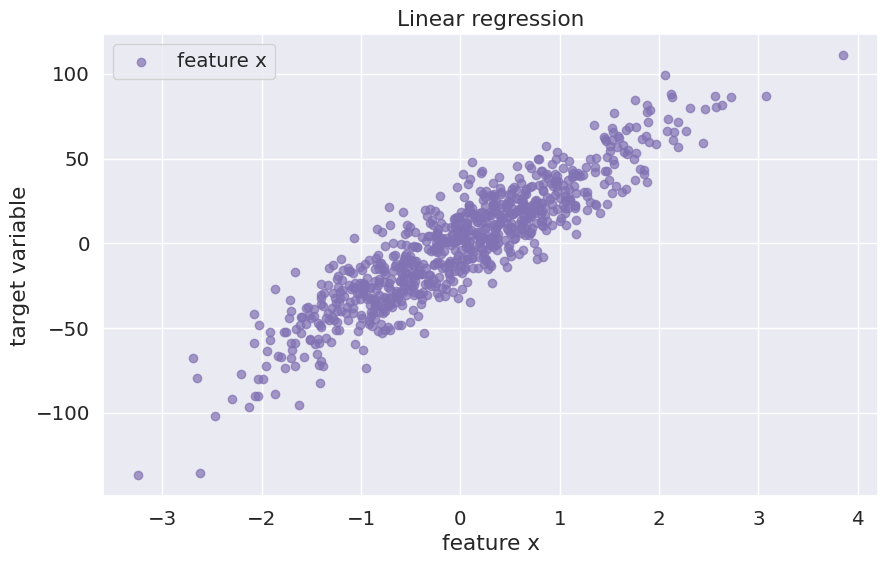

In [3]:
# Create a scatter plot to visualize the relationship between the feature and the target variable in a linear regression context
plt.figure(figsize=(10,6))
plt.title('Linear regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(data, target, label='feature x', color='m', alpha=0.7)
plt.legend()
plt.show()

###Division of data into training and test collection

In [4]:
# Import the train_test_split function from scikit-learn model_selection module
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 30% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (560, 1)
X_test shape: (240, 1)
y_train shape: (560,)
y_test shape: (240,)


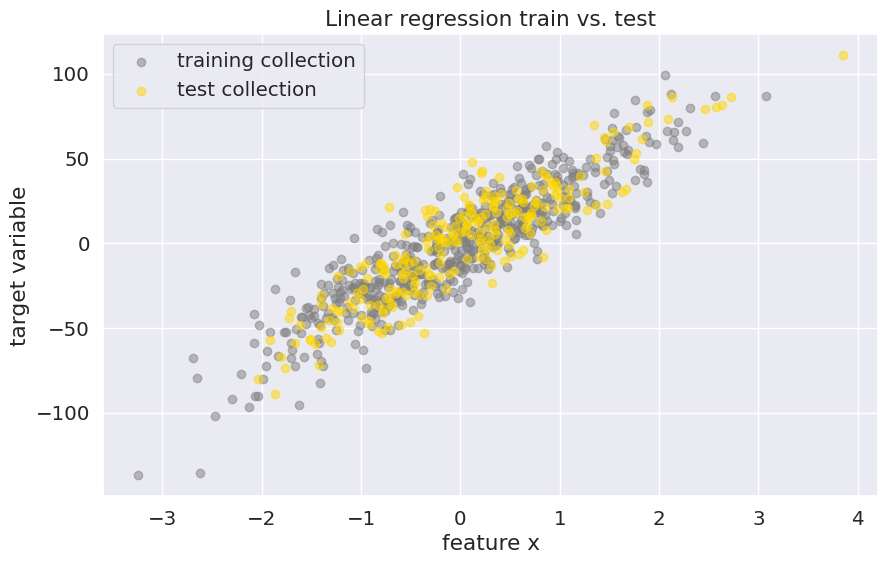

In [5]:
# Create a scatter plot comparing the training and test sets
plt.figure(figsize=(10,6))
plt.title('Linear regression train vs. test')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='training collection', color='gray', alpha=0.5)
plt.scatter(X_test, y_test, label='test collection', color='gold', alpha=0.5)
plt.legend()
plt.show()


###Linear regression

In [6]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Initialize a linear regression model and fit it to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
# Calculate and return coefficient of determination (R^2) for the training set
regressor.score(X_train, y_train)

print(f'Fitting the model to the training data (R^2): {regressor.score(X_train, y_train):.3f}')

Fitting the model to the training data (R^2): 0.825


In [8]:
# Calculate and return coefficient of determination (R^2) for the test set
regressor.score(X_test, y_test)

print(f'Fitting the model to the test data (R^2): {regressor.score(X_test, y_test):.3f}')

Fitting the model to the test data (R^2): 0.812


In [9]:
# Display the intercept and coefficient of the linear regression model
print(f"Intercept: {regressor.intercept_:.3f}")
print(f"Coef: {regressor.coef_[0]:.3f}")

Intercept: -0.355
Coef: 31.862


###Linear regression - training set - visualization

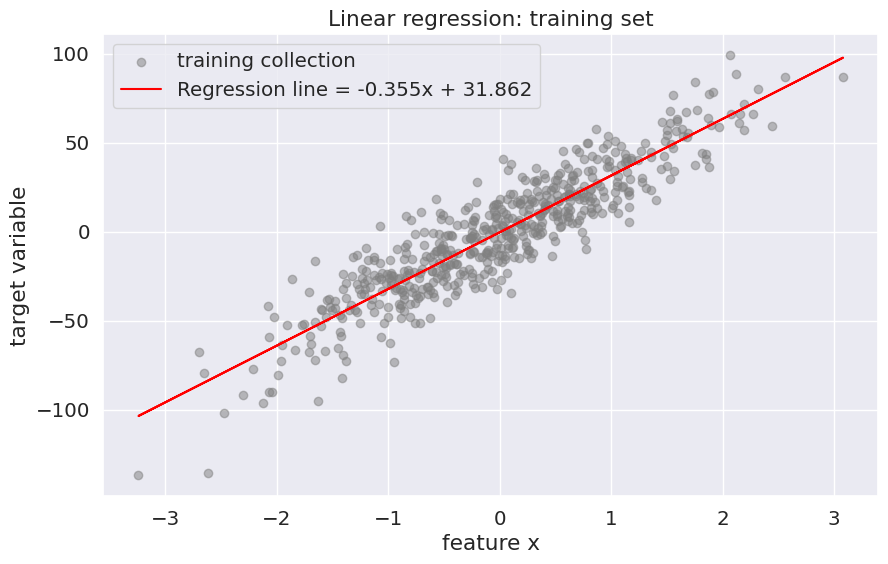

In [10]:
# Retrieve the slope (coefficient) and intercept of the trained linear regression model
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Plot the training set data alony with the linear regression line
plt.figure(figsize=(10,6))
plt.title('Linear regression: training set')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='training collection', color='gray', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color='red', label='Regression line = '  f"{intercept:.3f}x + {slope:.3f}")
plt.legend()
plt.show()

###Linear regression - test set - visualization

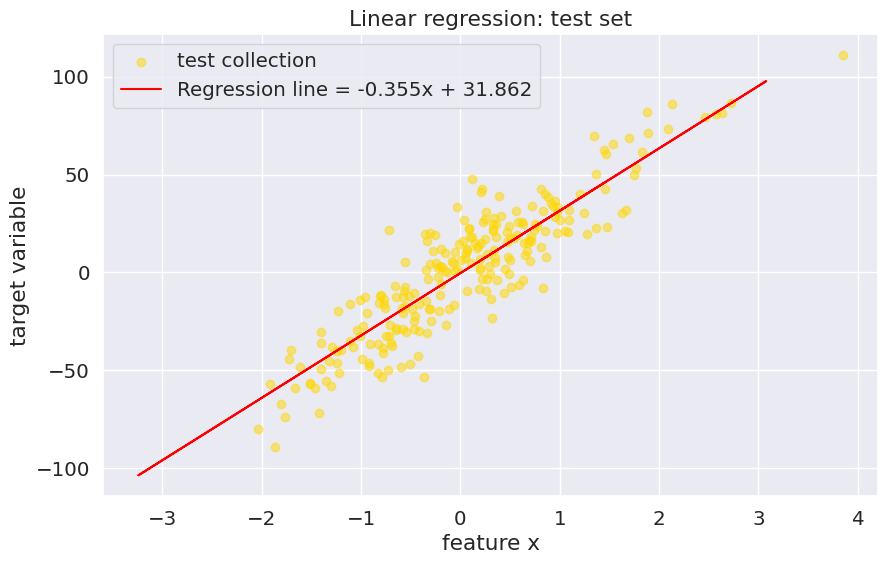

In [11]:
# Retrieve the slope (coefficient) and intercept of the trained linear regression model
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Plot the test set data alony with the linear regression line
plt.figure(figsize=(10,6))
plt.title('Linear regression: test set')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_test, y_test, label='test collection', color='gold', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color='red', label='Regression line = '  f"{intercept:.3f}x + {slope:.3f}")
plt.legend()
plt.show()

###Model-based prediction

In [12]:
# Generate predictions for the test set using the trained linear regression model
y_pred = regressor.predict(X_test)

# Create a DataFrame to compare the true values (y_yest) with the predicted values (y_pred)
predictions = pd.DataFrame(data= {'y_true': y_test, 'y_pred': y_pred})
predictions.head()

,y_true,y_pred
0,-3.460204,8.297677
1,-42.840048,-13.956913
2,13.399543,5.162486
3,24.788647,9.973240
4,10.196912,-2.169892


In [13]:
# Calculate the prediction error as the difference between the true and predicted values
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,-3.460204,8.297677,-11.757880
1,-42.840048,-13.956913,-28.883135
2,13.399543,5.162486,8.237057
3,24.788647,9.973240,14.815407
4,10.196912,-2.169892,12.366804


In [14]:
# Calculate the squared error by squaring the prediction errors
predictions['error_squared'] = predictions['error'] **2
predictions.head()

,y_true,y_pred,error,error_squared
0,-3.460204,8.297677,-11.757880,138.247751
1,-42.840048,-13.956913,-28.883135,834.235505
2,13.399543,5.162486,8.237057,67.849116
3,24.788647,9.973240,14.815407,219.496286
4,10.196912,-2.169892,12.366804,152.937840


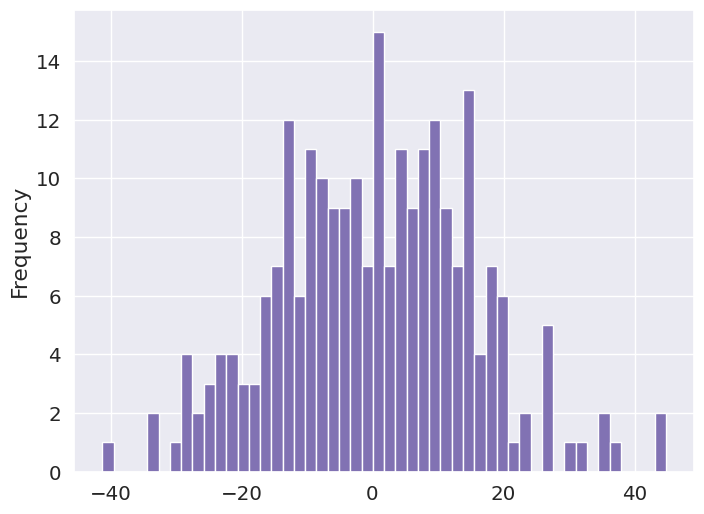

In [15]:
# Plot a histogram of the prediction errors to visualize their distribution
_ = predictions['error'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

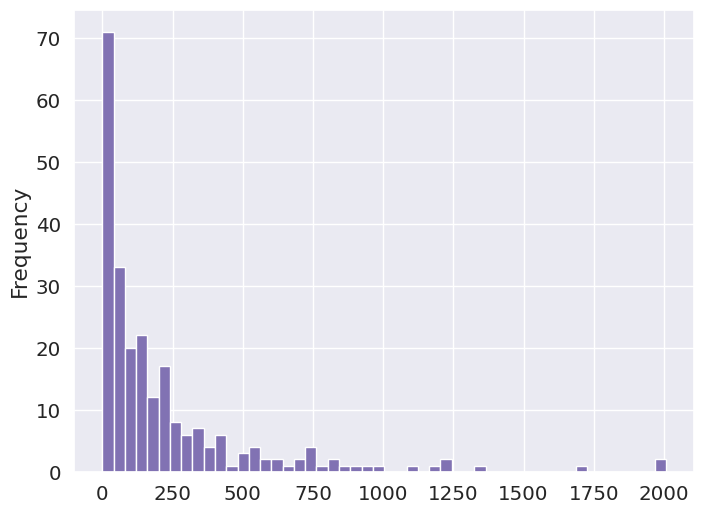

In [16]:
# Plot a histogram of the squared predictions errors to analyze their distribution
_ = predictions['error_squared'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

###Linear regression metrics

- Mean Absolute Error

In [17]:
# Calculate and return Mean Absolute Error (MAE) between the true and predicted values
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)
print(f"The model makes an average error of {mean_absolute_error(y_test, y_pred):.3f}")

The model makes an average error of 12.051


- Mean Squared Error

In [18]:
# Calculate and return Mean Squared Error (MSE) between the true and predicted values
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)
print(f'The mean squared error of the model is: {mean_squared_error(y_test, y_pred):.3f}')

The mean squared error of the model is: 223.432


- Root Mean Squared Error - RMSE

In [19]:
# Calculate the Root Mean Squared Error (RMSE) by takig the square root of the Mean Swuared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse:.3f}')

The Root Mean Squared Error (RMSE) of the model is: 14.948


- Max Error

In [20]:
# Calculate the maximum error between the actual and predicted values
from sklearn.metrics import max_error

max_err= max_error(y_test, y_pred)
print(f'The maximum error of the model is: {max_err:.3f}')

The maximum error of the model is: 44.797


- R2 score - coefficient of determination

In [21]:
# Calculate the R^2 (coefficient of determination) score for the model predictions
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'The R^2 score of the model is: {r2:.3f}')

The R^2 score of the model is: 0.812


###Simple gradient method

####data preparation

In [22]:
# Data preparation
m = len(X_train)

# Reshape X_train and y_train to the appropriate dimensions
X_train = X_train.reshape(m, 1)  # X_train should already be shaped (700, 1)
y_train = y_train.reshape(-1, 1)  # Reshape y_train to (700, 1)

# Add a column of ones for the bias term
bias = np.ones((m, 1))
X = np.append(bias, X_train, axis=1)

# Random initialization of parameters
eta = 0.01 # Learning rate
weights = np.random.randn(2, 1)  # Initialize weights randomly

# Gradient descent method
intercept_gradient = []  # To store intercept values during training
coef_gradient = []  # To store coefficient values during training

for i in range(3000):
    gradient = (2 / m) * X.T.dot(X.dot(weights) - y_train)  # Calculate the gradient
    weights -= eta * gradient  # Update weights using the gradient
    intercept_gradient.append(weights[0][0])  # Store the intercept value
    coef_gradient.append(weights[1][0])  # Store the coefficient value

# Print the results
print("Coefficient (coef): {:.3f}".format(weights[1][0]))  # Print the coefficient with 3 decimal places
print("Intercept (bias): {:.3f}".format(weights[0][0]))  # Print the intercept with 3 decimal places

Coefficient (coef): 31.862
Intercept (bias): -0.355


####Comparison of coefficients

- before using the gradient

In [23]:
# Create a DataaFrame to store the initial intercept and coefficient values
initial_df = pd.DataFrame({
    'Intercept': [intercept],
    'Coefficient': [slope]
})

initial_df

,Intercept,Coefficient
0,-0.355469,31.862372


- after using a gradient

In [24]:
# Create a DataaFrame to store the initial intercept and coefficient values
final_df = pd.DataFrame({
    'Intercept': [intercept_gradient[-1]],
    'Coefficient': [coef_gradient[-1]]
})

final_df

,Intercept,Coefficient
0,-0.355469,31.862372


- comparison

In [25]:
# Combine the initial and final DataFrames into one DataFrame
results_df = pd.concat([initial_df, final_df], axis=0).reset_index(drop=True)
results_df.index = ['Before Gradient', 'After Gradient']
results_df = results_df.round(3)

results_df



,Intercept,Coefficient
Before Gradient,-0.355,31.862
After Gradient,-0.355,31.862


In [26]:
print("The model achieved its local minimum before applying gradient descent.\n"
"The gradient is unable to improve the parameters, suggesting that the model is already reasonably well-fitted to the data.")

The model achieved its local minimum before applying gradient descent.
The gradient is unable to improve the parameters, suggesting that the model is already reasonably well-fitted to the data.
